este es el clf --> MultinomialNB()
confusion matrix :  [[6, 31, 47], [6, 53, 53], [21, 96, 187]]
accuracy and recall 10s:  (0.18181818181818182, 0.07142857142857142)
accuracy and recall 20s:  (0.29444444444444445, 0.4732142857142857)
accuracy and recall 30s:  (0.6515679442508711, 0.6151315789473685)


este es el clf --> DecisionTreeClassifier(max_depth=10)


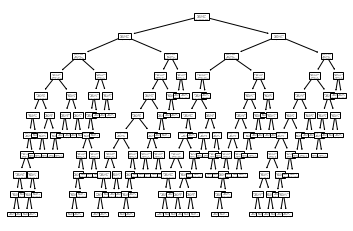

ZeroDivisionError: division by zero

In [7]:
from description import data_base
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from math import floor
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


training_rate = 0.9


feature_matrix,class_list = data_base.get_feature_matrix(),data_base.get_class_list()

classifier_methods = [
    MultinomialNB
    ,lambda:DecisionTreeClassifier(max_depth=10)
    #,lambda:RandomForestClassifier(max_depth=10)
    #,lambda:MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)
    ,lambda:KNeighborsClassifier(n_neighbors=3)
]

plotting_fs = [lambda clf: None,lambda clf:tree.plot_tree(clf),lambda clf: None,lambda clf: None, lambda clf: None]

for classifier_method,plotting_f in zip(classifier_methods,plotting_fs):
    clf = classifier_method()
    print('este es el clf -->',clf)
    training_length = floor(len(feature_matrix) * training_rate)

    clf.fit(feature_matrix[0:training_length],class_list[0:training_length])

    plotting_f(clf)
    plt.show()

    #confussion_matrix_female,confussion_matrix_male = [[0]*2]*2,[[0]*2]*2
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
    age_to_index ={'10s':0,'20s':1,'30s':2}
    def get_accuracy_and_recall(confusion_matrix,age):
        return confusion_matrix[age][age]/(confusion_matrix[0][age]+confusion_matrix[1][age]+confusion_matrix[2][age]),confusion_matrix[age][age]/(confusion_matrix[age][0]+confusion_matrix[age][1]+confusion_matrix[age][2])

    for predicted_class,real_class in zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]):
        #print(predicted_class,real_class)
        pI,rI = age_to_index[predicted_class],age_to_index[real_class]
        confusion_matrix[pI][rI]+=1

    accuracy_10s,accuracy_20s,accuracy_30s = get_accuracy_and_recall(confusion_matrix,0),get_accuracy_and_recall(confusion_matrix,1),get_accuracy_and_recall(confusion_matrix,2)

    print('confusion matrix : ',confusion_matrix)
    print('accuracy and recall 10s: ',accuracy_10s)
    print('accuracy and recall 20s: ',accuracy_20s)
    print('accuracy and recall 30s: ',accuracy_30s)
    print()
    print()

#     female_accuracy_and_recall,male_accuracy_and_recall = get_accuracy_and_recall(confussion_matrix_female),get_accuracy_and_recall(confussion_matrix_male)
#     print('female confussion matrix: ',confussion_matrix_female, 'male confussion matrix: ',confussion_matrix_male,'female accurary and recall: ',female_accuracy_and_recall,'male accuracy and recall: ',male_accuracy_and_recall)
    save_confussion_matrix_age = [
        [''    ,        '10s '         ,        '20s'         ,      '30s'           ],
        ['10s' , confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[0][2]],
        ['20s' , confusion_matrix[1][0],confusion_matrix[1][1],confusion_matrix[1][2]],
        ['30s' , confusion_matrix[2][0],confusion_matrix[2][1],confusion_matrix[2][2]],
    ]
    # save_confussion_matrix_gender = [
    #     [''             , 'Female '                       ,       ''                     ],
    #     [''             , 'Relevante '                    , 'No relevante'               ],
    #     ['Recuperada'   ,   confussion_matrix_female[0][0],confussion_matrix_female[0][1]],
    #     ['No recuperada',   confussion_matrix_female[1][0],confussion_matrix_female[1][1]],
    #     [''             , 'Male '                         ,       ''                     ],
    #     [''             , 'Relevante '                    , 'No relevante'               ],
    #     ['Recuperada'   ,   confussion_matrix_male[0][0]  ,confussion_matrix_male[0][1]  ],
    #     ['No recuperada',   confussion_matrix_male[1][0]  ,confussion_matrix_male[1][1]  ]
    # ]
    pd.DataFrame(data = save_confussion_matrix_age).to_csv("ConfusionMatrixAge"+str(clf).split("(")[0]+".csv", index = False, header=False)


# #print(normalizedLines)